# Quy tắc Neighbourhood Cleaning 


Quy tắc Neighbourhood Cleaning hoạt động như sau:

1) Loại các quan sát bị nhiễu khỏi lớp đa số vơi ENN:
- khám phá 3 neighbour gần nhất
- sử dụng lựa chọn đa số của neighbour để giữ lại quan sát

2) Loại quan sát khỏi lớp đa số nếu:

- chúng là 1 trong 3 neighbour gần nhất với mẫu thiểu số và
- phần lớn/toàn bộ 3 neighbour gần nhất đó không thuộc nhóm thiểu số và
- lớp đa số có ít nhất một nửa số quan sát như lớp đa số (điều này có thể điều chỉnh)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import NeighbourhoodCleaningRule

## Tạo dữ liệu

Chúng ta sẽ tạo dữ liệu, trong đó các lớp có mức độ phân tách khác nhau.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # trả về mảng
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# các lớp phân tách thế nào
                           random_state=1)
    
    # biến đổi mảng thành pandas df và series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Quy tắc Neighbourhood Cleaning

[NeighbourhoodCleaningRule](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NeighbourhoodCleaningRule.html)

### Các lớp được phân tách tốt

In [3]:
# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập quy tắc Neighbourhood cleaning
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# undersample từ tất cả các lớp trừ lớp thiểu số
    n_neighbors=3, # khám phá 3 neighbour mỗi quan sát
    kind_sel='all', # tất cả neighbour cần không đồng ý, chỉ áp dụng với bước cleaning
                    # thay vào đó, chúng ta có thể đặt nó thành mode và sau đó phần lớn neighbour
                    # cần không đồng ý mới được loại.
    n_jobs=4, # 4 bộ xử lý trong máy
    threshold_cleaning=0.5, # ngưỡng đánh giá một lớp cho cleaning (chỉ dùng cho bước cleaning)
) 

# Lưu ý, triển khai threshold_cleaning bởi imbalanced-learn không
# khớp với những gì được miêu tả trong bài viết gốc. Lúc này, nó sẽ
# chỉ làm sạch các quan sát nếu lớp ít nhất có ngưỡng * X.shape[0]
# số lượng quan sát

X_resampled, y_resampled = ncr.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[NeighbourhoodCleaningRule()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NeighbourhoodCleaningRule.html)

</details>

In [4]:
# kích thước dữ liệu gốc

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((979, 2), (979,))

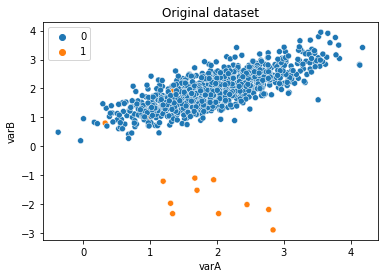

In [6]:
# vẽ biểu đồ dữ liệu gốc

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

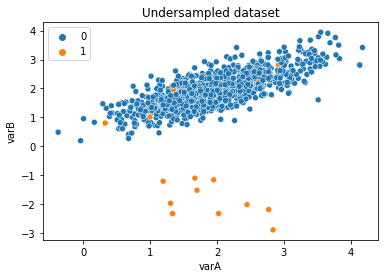

In [7]:
# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Lưu ý các chấm vàng giờ đã nhìn rõ hơn do các quan sát lân cận của lớp khác đã bị loại khỏi tập dữ liệu.

**BÀI TẬP**

- thử các tham số của NCL transformer và kiểm tra kích thước của tập dữ liệu trả về và phân phối của các mẫu.

### Các lớp phân tách một phần

Hãy lặp lại bài tập tương tự trong dữ liệu có các lớp không được phân tách quá rõ ràng. 

In [8]:
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu
X, y = make_data(sep=0)

# thiết lập quy tắc Neighbourhood cleaning

ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# undersample từ tất cả các lớp trừ lớp thiểu số
    n_neighbors=3, # khám phá 3 neighbour mỗi quan sát
    kind_sel='mode', # tất cả neighbour cần không đồng ý, chỉ áp dụng với bước cleaning
                    # thay vào đó, chúng ta có thể đặt nó thành mode và sau đó phần lớn neighbour
                    # cần không đồng ý mới được loại.
    n_jobs=4, # 4 bộ xử lý trong máy
    threshold_cleaning=0.5, # ngưỡng đánh giá một lớp cho cleaning (chỉ dùng cho bước cleaning)
) 

X_resampled, y_resampled = ncr.fit_resample(X, y)

In [9]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((951, 2), (951,))

Do các lớp không phân biệt rõ ràng nên có nhiều mẫu bị loại khỏi tập dữ liệu hơn.

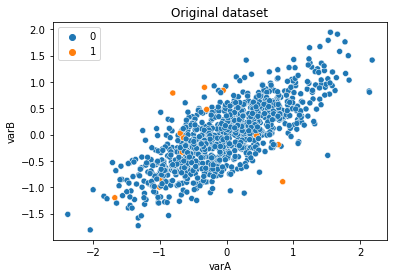

In [11]:
# vẽ biểu đồ dữ liệu gốc

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

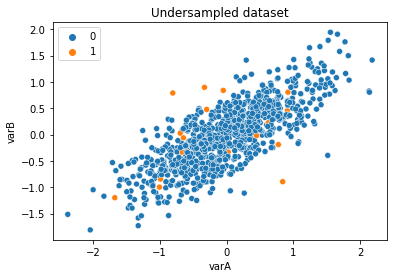

In [12]:
# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

Lưu ý rằng các quan sát đã bị xóa khỏi khu vực xung quanh lớp thiểu số.

## Quy tắc Neighbourhood Cleaning

### Dữ liệu thực - So sánh chất lượng

Nó có hoạt động tốt với các tập dữ liệu thực không? 

Điều này còn tùy thuộc vào tập dữ liệu, do đó hãy thử và so sánh mô hình đã xây trên toàn bộ tập dữ liệu với mô hình được xây trên tập dữ liệu undersampled.

In [13]:
# load dữ liệu
# chỉ một vài quan sát để tăng tốc tính toán

data = pd.read_csv('kdd2004.csv').sample(10000, random_state=10)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
76689,36.51,31.00,0.22,-50.5,28.5,1775.5,0.74,1.66,-11.5,-87.5,...,1478.4,0.19,4.55,5.0,-127.0,1029.8,0.39,0.47,0.44,-1
61613,87.56,25.79,0.73,-24.0,6.5,2078.1,-0.61,1.00,7.5,-86.5,...,1549.9,0.30,-2.28,-17.0,-89.0,906.4,0.34,0.30,0.21,-1
14280,43.55,24.14,-2.09,-68.0,37.0,438.0,1.76,-0.02,-6.0,-55.0,...,-63.0,1.83,0.92,2.0,-46.0,182.5,-1.12,0.15,0.19,-1
61672,39.17,28.24,0.86,-13.0,-25.5,2326.5,0.94,0.04,-1.0,-81.5,...,1995.8,0.39,-4.37,-23.0,-54.0,188.8,2.80,0.55,0.47,-1
70728,88.80,22.52,0.89,5.0,-30.0,620.9,1.12,0.19,-4.0,-66.0,...,751.9,-0.22,-0.39,-4.0,-41.0,337.5,0.77,0.25,0.39,-1


In [14]:
# mục tiêu không cân bằng

data.target.value_counts() / len(data)

-1    0.9913
 1    0.0087
Name: target, dtype: float64

In [16]:
# tách thành tập huấn luyện và tập kiểm tra
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

In [17]:
# thiết lập quy tắc Neighbourhood cleaning
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# undersample từ tất cả các lớp trừ lớp thiểu số
    n_neighbors=3, # khám phá 3 neighbour mỗi quan sát
    kind_sel='mode', # tất cả/phần lớn neighbour cần không đồng ý, chỉ áp dụng với bước cleaning
    n_jobs=4, # 4 bộ xử lý trong máy
    threshold_cleaning=0.1, # ngưỡng đánh giá một lớp cho cleaning (chỉ dùng cho bước cleaning)
) 

X_ncr, y_ncr = ncr.fit_resample(X_train, y_train)

In [18]:
# so sánh hình dạng

X_train.shape, X_ncr.shape

((7000, 74), (6876, 74))

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [19]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    ## Yêu cầu 5:
    ## VIẾT CODE Ở ĐÂY:
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

<details><summary> Gợi ý </summary>

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

</details>

In [20]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng
## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9946325648414985
Test set
Random Forests roc-auc: 0.983555705049146


In [21]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_ncr,
                  X_test,
                  y_ncr,
                  y_test)

Train set
Random Forests roc-auc: 0.9907717136150235
Test set
Random Forests roc-auc: 0.9875671163932179


Có cải thiện chất lượng rất nhỏ.

**BÀI TẬP**

- Thay đổi số lượng neighbour. So sánh kích thước dữ liệu, phân phối của quan sát và chất lượng mô hình. Cũng thay đổi phương thức lựa chọn từ all thành mode và đánh giá các khía cạnh tương tự.

 ==== 1 neighbours, all kind_sel ====
Original data shape: X: (7000, 74), y: (7000,)
Reshapled data shape: X_ncr: (6982, 74), y_ncr: (6982,)
Train set
Random Forests roc-auc: 0.991498121930078
Test set
Random Forests roc-auc: 0.977987068804425
 ==== 1 neighbours, mode kind_sel ====
Original data shape: X: (7000, 74), y: (7000,)
Reshapled data shape: X_ncr: (6950, 74), y_ncr: (6950,)
Train set
Random Forests roc-auc: 0.9943952588292211
Test set
Random Forests roc-auc: 0.9740005730587634
 ==== 3 neighbours, all kind_sel ====
Original data shape: X: (7000, 74), y: (7000,)
Reshapled data shape: X_ncr: (7000, 74), y_ncr: (7000,)
Train set
Random Forests roc-auc: 0.9946325648414985
Test set
Random Forests roc-auc: 0.983555705049146
 ==== 3 neighbours, mode kind_sel ====
Original data shape: X: (7000, 74), y: (7000,)
Reshapled data shape: X_ncr: (6876, 74), y_ncr: (6876,)
Train set
Random Forests roc-auc: 0.9907717136150235
Test set
Random Forests roc-auc: 0.9875671163932179
 ==== 5 neighbour

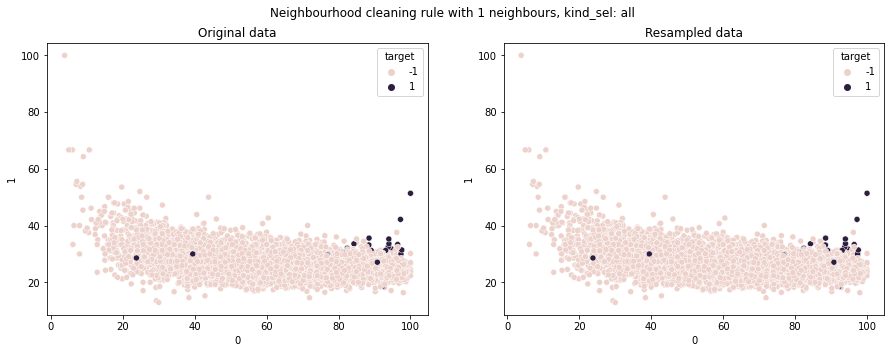

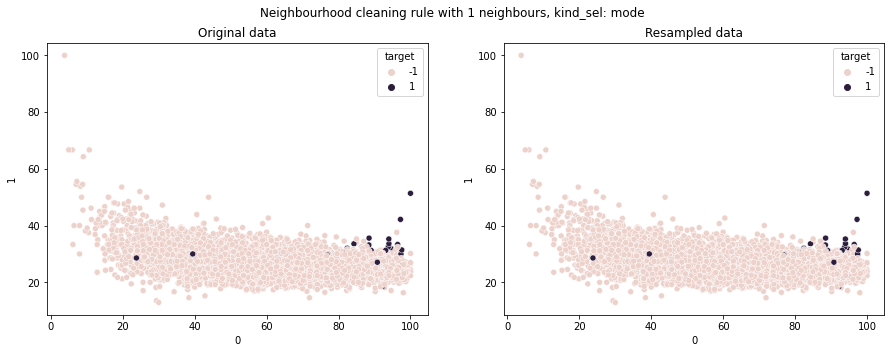

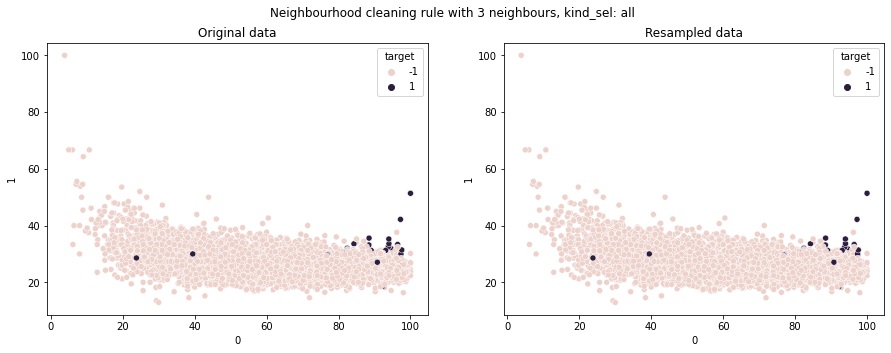

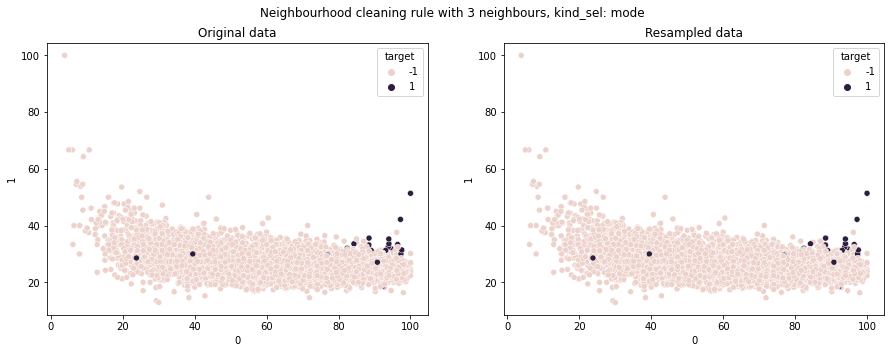

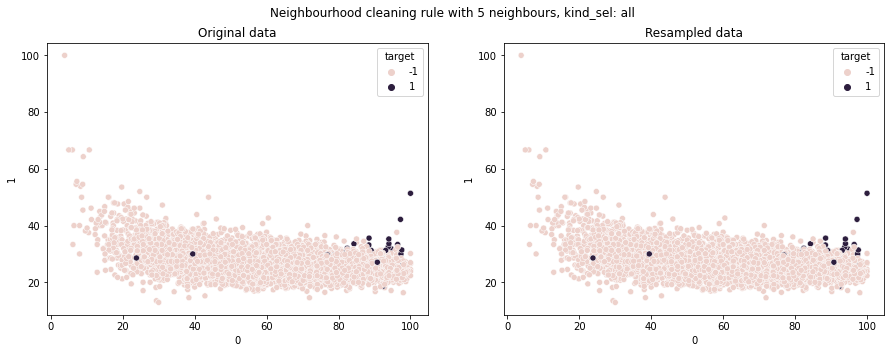

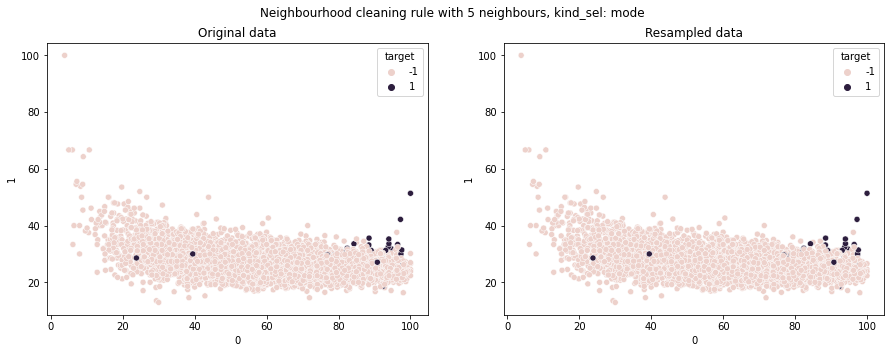

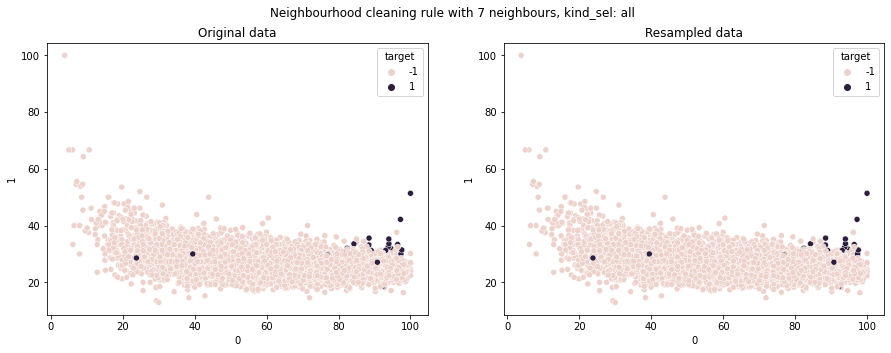

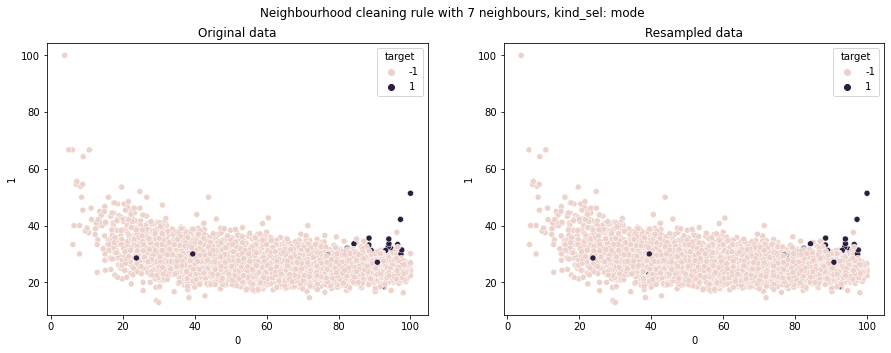

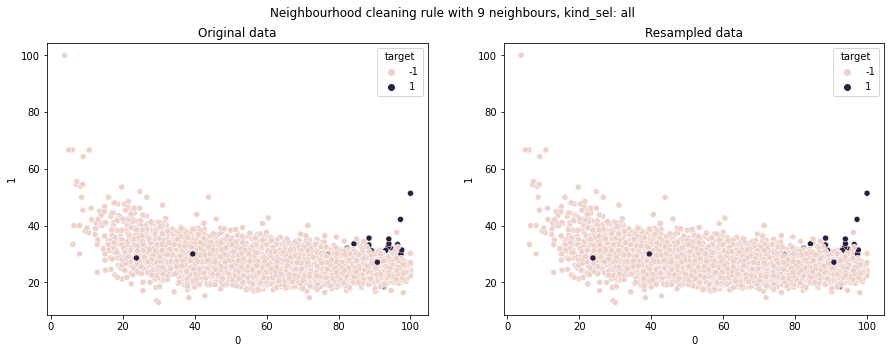

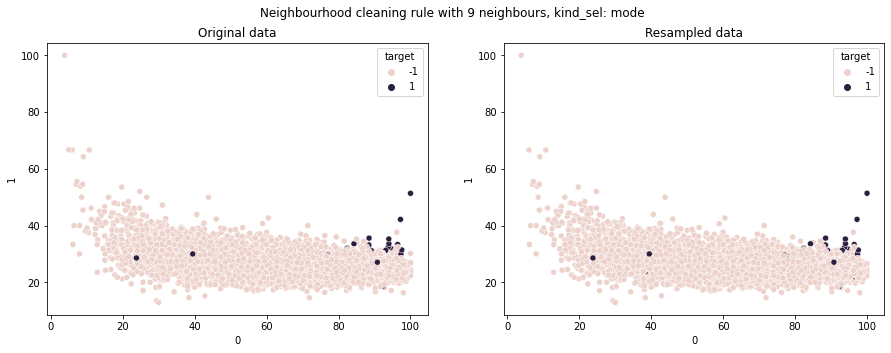

In [22]:
for noNeighbour in [1, 3, 5, 7, 9]:
    for kind_sel in ['all', 'mode']:
        ncr = NeighbourhoodCleaningRule(
            sampling_strategy='auto',# undersample từ tất cả các lớp trừ lớp thiểu số
            n_neighbors=noNeighbour, # khám phá 3 neighbour mỗi quan sát
            kind_sel=kind_sel, # tất cả/phần lớn neighbour cần không đồng ý, chỉ áp dụng với bước cleaning
            n_jobs=4, # 4 bộ xử lý trong máy
            threshold_cleaning=0.1, # ngưỡng đánh giá một lớp cho cleaning (chỉ dùng cho bước cleaning)
        ) 
        X_ncr, y_ncr = ncr.fit_resample(X_train, y_train)
        
        print(" ==== {} neighbours, {} kind_sel ====".format(noNeighbour, kind_sel))
        print("Original data shape: X: {}, y: {}".format(X_train.shape, y_train.shape))
        print("Reshapled data shape: X_ncr: {}, y_ncr: {}".format(X_ncr.shape, y_ncr.shape))       
        run_randomForests(X_ncr,
                          X_test,
                          y_ncr,
                          y_test)
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle("Neighbourhood cleaning rule with {} neighbours, kind_sel: {}".format(noNeighbour, kind_sel))
        ax0 = sns.scatterplot(ax=axes[0], x="0", y="1", data=X_train, hue=y_train)
        ax0.set_title("Original data")
        ax1 = sns.scatterplot(ax=axes[1], x="0", y="1", data=X_ncr, hue=y_ncr)
        ax1.set_title("Resampled data")
        
# Original data:
# Train set
# Random Forests roc-auc: 0.9946325648414985
# Test set
# Random Forests roc-auc: 0.983555705049146

# NearMiss

Quy trình sẽ lựa chọn các mẫu phần nào tương tự với lớp thiểu số, sử dụng 1 trong 3 quy trình thay thế sau:

1) Lựa chọn các quan sát gần hơn tới gần nhất với lớp thiểu số

2) Lựa chọn các quan sát gần hơn tới xa nhất với lớp thiểu số

3) Lựa chọn các quan sát xa nhất từ các NN của chúng

===

Quy trình này sẽ lựa chọn lượng quan sát của lớp đa số bằng với lượng quan sát của lớp thiểu số có trong tập dữ liệu.

===

**Kích thước dữ liệu cuối cùng**: 2 x lớp thiểu số

In [23]:
from imblearn.under_sampling import NearMiss

## Undersample với NearMiss

[NearMiss](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)

### Các lớp được phân tách tốt

In [25]:
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập Near Miss, phương thức đầu tiên 
# là, version = 1

nm1 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=1,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = nm1.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[NearMiss()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)

</details>

In [26]:
# kích thước dữ liệu gốc

X.shape, y.shape

((1000, 2), (1000,))

In [27]:
# kích thước dữ liệu undersampled
# lớp đa số bị undersamples cho tới khi khớp với lớp thiểu số

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [28]:
y.value_counts()

0    983
1     17
dtype: int64

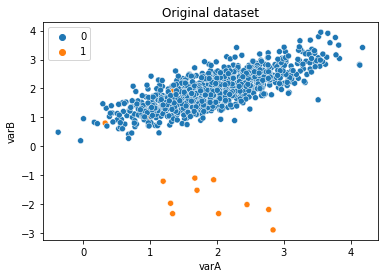

In [29]:
# vẽ biểu đồ dữ liệu gốc

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

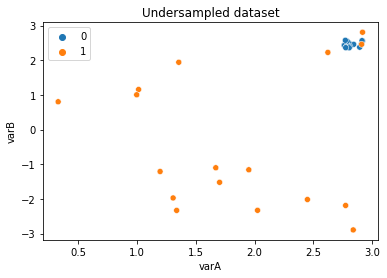

In [30]:
# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Lưu ý các quan sát gần nhất với lớp thiểu số được giữ lại trong tập dữ liệu.

**Hãy thử phương thức thứ hai**

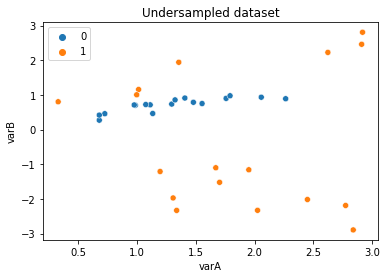

In [31]:
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:

# version = 2

nm2 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=2,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = nm2.fit_resample(X, y)

# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

<details><summary> Gợi ý </summary>

Đặt ```version=2```

</details>

Phương thức giữ lại các quan sát gần nhất tới xa nhất của lớp thiểu số.

In [32]:
# một lần nữa, lớp đa số bị undersampled cho tới khi
# có lượng quan sát bằng số lượng quan sát của lớp thiểu số

X_resampled.shape

(34, 2)

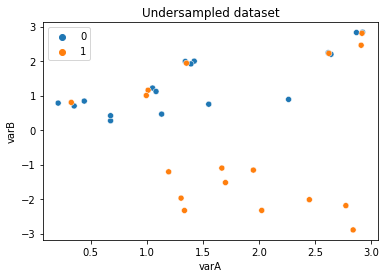

In [33]:
## Yêu cầu 9:
## VIẾT CODE Ở ĐÂY:

# version = 3

nm3 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=3,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = nm3.fit_resample(X, y)

# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

<details><summary> Gợi ý </summary>

Đặt ```version=3```

</details>

### Các lớp phân tách một phần

Hãy lặp lại bài tập tương tự trong dữ liệu có các lớp không được phân tách quá rõ ràng.

In [34]:
## Yêu cầu 10:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu
X, y = make_data(sep=0)

# thiết lập edited nearest neighbour transformer

nm1 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=1,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = nm1.fit_resample(X, y)

In [35]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [36]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

Do các lớp không phân biệt rõ ràng nên có nhiều mẫu bị loại khỏi tập dữ liệu hơn.

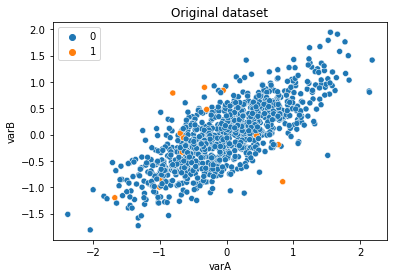

In [37]:
# vẽ biểu đồ dữ liệu gốc

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

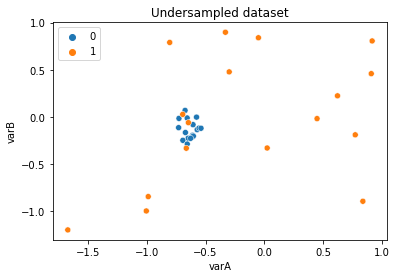

In [38]:
# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

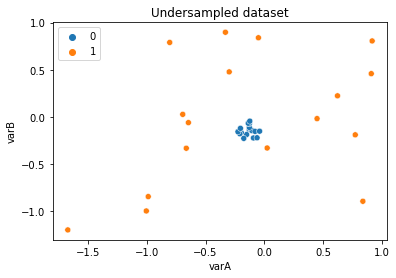

In [39]:
## Yêu cầu 11:
## VIẾT CODE Ở ĐÂY:

# version 2
nm2 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=2,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = nm2.fit_resample(X, y)

# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

<details><summary> Gợi ý </summary>

Đặt ```version=2```

</details>

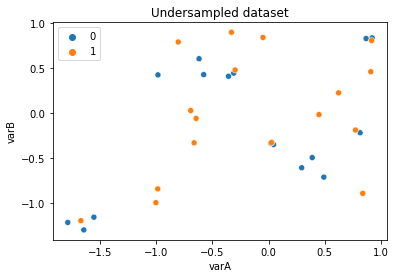

In [40]:
## Yêu cầu 12:
## VIẾT CODE Ở ĐÂY:

# version 3

nm3 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=3,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = nm3.fit_resample(X, y)

# vẽ biểu đồ dữ liệu undersampled

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

<details><summary> Gợi ý </summary>

Đặt ```version=3```

</details>

## NearMiss

### Dữ liệu thực - So sánh chất lượng

Nó có hoạt động tốt với các tập dữ liệu thực không? 

Điều này còn tùy thuộc vào tập dữ liệu, do đó hãy thử và so sánh mô hình đã xây trên toàn bộ tập dữ liệu với mô hình được xây trên tập dữ liệu undersampled.

In [41]:
# load dữ liệu
# chỉ một vài quan sát để tăng tốc tính toán

data = pd.read_csv('kdd2004.csv').sample(10000)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
83611,40.41,27.42,-1.19,-28.0,79.0,2120.2,-0.73,-1.17,-21.5,-49.0,...,2246.3,-1.02,-0.60,-3.0,-27.0,107.2,0.43,0.37,-0.44,-1
47147,82.89,23.04,-1.03,-1.0,-10.5,1724.8,-0.20,-0.24,2.0,-92.0,...,1351.7,0.46,2.96,6.0,-92.0,704.4,1.14,0.47,0.69,-1
64879,32.69,25.64,-0.05,-27.5,27.0,1366.2,-0.07,-0.49,-26.5,-57.5,...,1668.9,0.26,1.10,-11.0,-36.0,350.5,-0.20,0.03,0.42,-1
115940,73.58,33.33,0.12,-10.5,-23.0,937.4,-0.98,3.29,10.0,-96.0,...,605.5,0.56,1.37,-4.0,-36.0,-5.5,1.87,0.15,-0.23,-1
98236,72.85,23.64,0.94,4.0,0.5,1196.5,0.78,1.03,11.5,-62.5,...,1457.3,-0.04,-1.79,-4.0,-26.0,84.0,1.61,0.25,0.44,-1


In [42]:
# mục tiêu không cân bằng

data.target.value_counts() / len(data)

-1    0.9909
 1    0.0091
Name: target, dtype: float64

In [44]:
# tách thành tập huấn luyện và tập kiểm tra
## Yêu cầu 13:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

In [45]:
# NearMiss version 1
## Yêu cầu 14:
## VIẾT CODE Ở ĐÂY:
nm1 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=1,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_nm1, y_nm1 = nm1.fit_resample(X_train, y_train)

In [46]:
# NearMiss version 2
## Yêu cầu 15:
## VIẾT CODE Ở ĐÂY:
nm2 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=2,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_nm2, y_nm2 = nm2.fit_resample(X_train, y_train)

<details><summary> Gợi ý </summary>

Set ```version=2```

</details>

In [47]:
# NearMiss version 3
## Yêu cầu 16:
## VIẾT CODE Ở ĐÂY:
nm3 = NearMiss(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    version=3,
    n_neighbors=3,
    n_jobs=4)  # có 4 core trong máy

X_nm3, y_nm3 = nm3.fit_resample(X_train, y_train)

<details><summary> Gợi ý </summary>

Set ```version=3```

</details>

In [48]:
# so sánh hình dạng

X_train.shape, X_nm1.shape, X_nm2.shape, X_nm3.shape

((7000, 74), (110, 74), (110, 74), (110, 74))

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [49]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [50]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng
## Yêu cầu 17:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9930492833300608
Test set
Random Forests roc-auc: 0.9716224321487479


In [51]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled của enn
## Yêu cầu 18:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_nm1,
                  X_test,
                  y_nm1,
                  y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.9376218323586745


In [52]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled
## Yêu cầu 19:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_nm2,
                  X_test,
                  y_nm2,
                  y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.981350277402909


In [53]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled
## Yêu cầu 20:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_nm3,
                  X_test,
                  y_nm3,
                  y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.9960076473234368


Trong trường hợp này, chất lượng không cải thiện dù đã áp dụng quy trình undersampling trên.

**BÀI TẬP**

Hãy thử NearMiss trong các tập dữ liệu khả dụng khác trong thư viện imbalanced-learn.

In [1]:
from cProfile import run
from imblearn.datasets import fetch_datasets

datasets_ls = [
    'car_eval_34',
    'ecoli',
    # 'thyroid_sick',
    # 'arrhythmia',
    # 'ozone_level'
]

for dataset in datasets_ls:
    print('\n ======= Test NearMiss for {} ========== '.format(dataset))
    data = fetch_datasets(dataset)['data']
    target = fetch_datasets(dataset)['target']
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.3, random_state=0)
    print("Random forest on original data")
    run_randomForests(X_train, X_test, y_train, y_test)
    
    print("Resample data ... ")
    print("Oringinal data shape: X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
    nm_1 = NearMiss(sampling_strategy='auto', version=1, n_neighbors=3, n_jobs=4)
    nm_2 = NearMiss(sampling_strategy='auto', version=2, n_neighbors=3, n_jobs=4)
    nm_3 = NearMiss(sampling_strategy='auto', version=3, n_neighbors=3, n_jobs=4)
    
    X_train_nm_1, y_train_nm_1 = nm_1.fit_resample(X_train, y_train)
    X_train_nm2, y_train_nm2 = nm_2.fit_resample(X_train, y_train)
    X_train_nm3, y_train_nm3 = nm_3.fit_resample(X_train, y_train)
    
    print("Resampled(version 1) data shape: X_train_nm_1: {}, y_train_nm_1: {}".format(X_train_nm_1.shape, y_train_nm_1.shape))
    print("Resampled(version 2) data shape: X_train_nm2: {}, y_train_nm2: {}".format(X_train_nm2.shape, y_train_nm2.shape))
    print("Resampled(version 3) data shape: X_train_nm3: {}, y_train_nm3: {}".format(X_train_nm3.shape, y_train_nm3.shape))
    
    print("Random forest on resampled data")
    print("Resampled(version 1)")
    run_randomForests(X_train_nm_1, X_test, y_train_nm_1, y_test)
    print("Resampled(version 2)")
    run_randomForests(X_train_nm2, X_test, y_train_nm2, y_test)
    print("Resampled(version 3)")
    run_randomForests(X_train_nm3, X_test, y_train_nm3, y_test)
    
    


 ======= Test NearMiss for car_eval_34 ========== 


/Users/ngothai/opt/miniconda3/envs/tf/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass data_home=car_eval_34 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


KeyError: 'data'